<a href="https://colab.research.google.com/github/MJannik/hu_wirtschaftsinformatik_2021/blob/main/Asymmetric%20Error%20Costs%20in%20Regression%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asymmetric Error Costs in Regression Models

## Seminar: Bachelor Seminar Wirtschaftsinformatik





This Cell imports important libraries like "pandas" or "numphy". 

It also asks for permission to connect to your GDrive. After running the cell, you have to click on the link and insert the code.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The next cell imports the car data into this notebook. 

**IMPORTANT:** Before running the next cell, go to the "Bachelorseminar Wirtschaftsinformatik" folder in GDrive and click "Add shortcut to Drive". This has to be done because Google Collab can only acces folders on YOUR Drive and not on a shared Drive.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Bachelorseminar Wirtschaftsinformatik/semWI_usedCar.csv")

# Data Cleansing
- Missing values
- Handle Outliers
- Necessary Transform

In [ ]:
# remove engine sizes 0
df = data
df = df[df['engineSize'] != 0 ]

# remove observation with year 2060
df = df[df['year'] != 2060 ]
df['carAge'] = 2020 - df['year']

Apply Box-Cox transformation on the variable price.

In [ ]:
from sklearn.preprocessing import PowerTransformer

price_list = df[['price']]

pt = PowerTransformer(method='box-cox')
pt.fit(price_list)
price_list_boxcox = pt.transform(price_list)

df['price'] = price_list_boxcox

lambda_ = pt.lambdas_[0] 

Apply dummy transformation on the variables brand

In [ ]:
df_dummies = pd.get_dummies(df, columns=['brand', 'transmission', 'fuelType'])
df_dummies = df_dummies.drop(['id', 'model', 'year'], axis=1)

df_dummies = df_dummies.drop(['brand_merc', 'fuelType_Electric','fuelType_Other', 'transmission_Other'], axis=1)
df = df_dummies

## Data Preperation


This cell splits the data into training, validation and test set. For this, it uses the numphy function split.

In [ ]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
X_train = train.drop(['price'], axis=1)
y_train = train[['price']]

X_validate = validate.drop(['price'], axis=1)
y_validate = validate[['price']]

X_test = test.drop(['price'], axis=1)
y_test = test[['price']]

## Estimate Model
This cell uses the statsmodels library to run an OLS regression on the training dataset. Below you can see the results of the regression.

In [ ]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          2.428e+04
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                        0.00
Time:                        18:47:52   Log-Likelihood:                         -19835.
No. Observations:               59347   AIC:                                  3.971e+04
Df Residuals:                   59328   BIC:                                  3.988e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mileage                -9.073e-06   1.03e-07    -87.690      0.000   -9.28e-06   -8.87e-06
tax                        0.0002   2.69e-05      8.405      0.000       0.000       0.000
mpg                       -0.0084      0.000    -55.595      0.000      -0.009      -0.008
engineSize                 0.6713      0.004    161.933      0.000       0.663       0.679
carAge                    -0.2142      0.001   -211.930      0.000      -0.216      -0.212
brand_audi                 0.0503      0.006      8.561      0.000       0.039       0.062
brand_bmw                 -0.1533      0.006    -26.592      0.000      -0.165      -0.142
brand_ford                -0.4191      0.006    -71.305      0.000      -0.431      -0.408
brand_hyundi              -0.6633      0.008    -83.699      0.000      -0.679      -0.648
brand_skoda               -0.4786      0.007    -67.095      0.000      -0.493      -0.465
brand_toyota              -0.7243      0.008    -93.990      0.000      -0.739      -0.709
brand_vauxhall            -0.8054      0.006   -128.188      0.000      -0.818      -0.793
brand_vw                  -0.2570      0.006    -45.332      0.000      -0.268      -0.246
transmission_Automatic     1.0376      0.033     31.320      0.000       0.973       1.103
transmission_Manual        0.8096      0.034     24.093      0.000       0.744       0.875
transmission_Semi-Auto     1.0597      0.033     31.752      0.000       0.994       1.125
fuelType_Diesel           -0.3637      0.028    -12.827      0.000      -0.419      -0.308
fuelType_Hybrid            0.2589      0.029      8.922      0.000       0.202       0.316
fuelType_Petrol           -0.4946      0.029    -17.321      0.000      -0.551      -0.439
==============================================================================
Omnibus:                     5785.338   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39922.216
Skew:                           0.193   Prob(JB):                         0.00
Kurtosis:                       6.999   Cond. No.                     1.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Verifying the 5 key assumptions

Those five test verify the 5 key assumptions of our regression model

Source: https://towardsdatascience.com/perform-regression-diagnostics-and-tackle-uncertainties-of-linear-models-1372a03b1f56 

### 1. Linearity

To confirm linearity we can use: i) Harvey-Collier multiplier test ii) Comparison of the Observed vs. Predicted values iii) Studentized residuals vs Fitted values

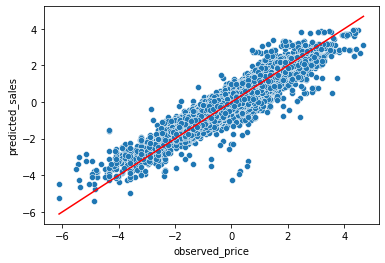

In [50]:
## observed vs predicted values

# Plot predicted values vs. Real values
observed_vs_predicted = pd.DataFrame(columns = ['predicted_price', 'price'])
observed_vs_predicted["predicted_price"] = model.predict(X_train)
observed_vs_predicted["price"] = y_train

X_plot = [observed_vs_predicted['price'].min(), observed_vs_predicted['price'].max()]

ax = sns.scatterplot(x="price", y="predicted_price", data=observed_vs_predicted)
ax.set(xlabel='observed_price', ylabel='predicted_sales')
plt.plot(X_plot, X_plot, color='r')
plt.show()

## We should see that the data is symmetrically distributed along the red diagonal with a roughly constant variance. 
## For us this is not the case...

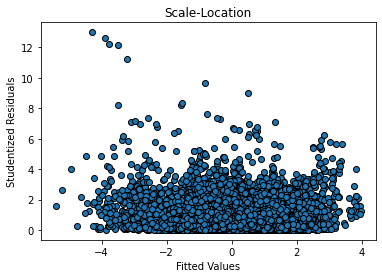

In [51]:
## studentized residuals vs fitted values

# Get the studentized residual
student_residuals = pd.Series(np.abs(model.get_influence().resid_studentized_internal))

# Plot the studentized residual
fig, ax = plt.subplots()
ax.scatter(predictions, student_residuals, edgecolors = 'k')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')

plt.show()

## All residuals should be small and not form any clusters

### 2. Normality

Non-normality of the residuals is an indication of an inadequate model
(i.e. the errors are not random)

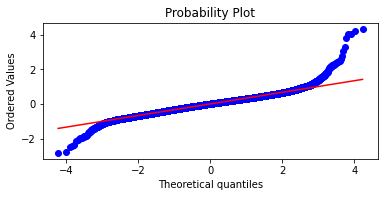

In [ ]:
## Plot residual Q-Q plot

import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))

residuals = model.resid
_, (__, ___, r) = sp.stats.probplot(residuals, plot=ax, fit=True)

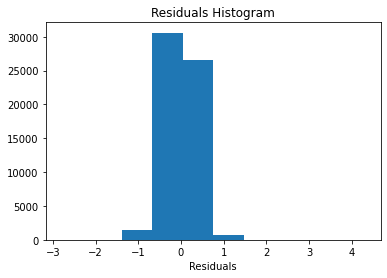

In [ ]:
## Histogram of residuals distribution

# Get Residuals
residuals = model.resid

# Plot Histogram of the residuals
plt.hist(residuals, )
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

##  If the residuals are normally distributed, 
## we should see a bell-shaped histogram centred on 0 and with a variance of 1

### 3. Homoscedasticity

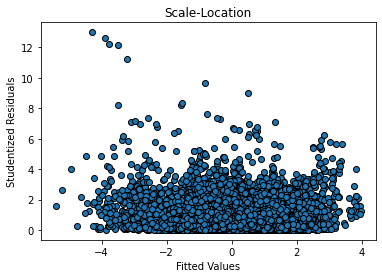

In [ ]:
## studentized residuals vs fitted values

# Get the studentized residual
student_residuals = pd.Series(np.abs(model.get_influence().resid_studentized_internal))

# Plot the studentized residual
fig, ax = plt.subplots()
ax.scatter(predictions, student_residuals, edgecolors = 'k')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')

plt.show()

## Residuals should be distributed equally far apart on a horizontal line

In [ ]:
## Breush-Pagan test
# measures how errors increase across the explanatory variable

from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
        
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

# If the p-value is under alpha (eg. 0.05) => assume heteroskedasticity

[('Lagrange multiplier statistic', 14271.96595305622),
 ('p-value', 0.0),
 ('f-value', 988.6756651155777),
 ('f p-value', 0.0)]

### 4. Independence

Independence of residual is commonly referred to as the total absence of autocorrelation

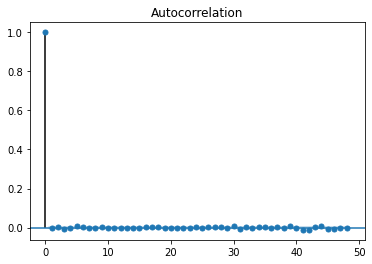

In [ ]:
## ACF plot

import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, alpha=0.05)

# if all values are in the confidence intervals, we don't have statistically significant autocorrelation

In [ ]:
## Durbin-Watson

# The test will output values between 0 and 4. Here are how to interpret the results of the test:
# — value = 2 means that there is no autocorrelation in the sample,
# — values < 2 indicate positive autocorrelation,
# — values > 2 negative autocorrelation.

import statsmodels.stats.stattools as st

st.durbin_watson(residuals, axis=0)

2.001959431428672

### 5. Multicollinearity

occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other

In [ ]:
## Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# For each X, calculate VIF and save in dataframe
X = add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# inspect results
vif.round(1) 

## We generally consider that a VIF of 5 or 10 and above 
## (depends on the business problem) indicates a multicollinearity problem

,VIF Factor,features
0,12467.9,const
1,2.5,mileage
2,1.5,tax
3,2.3,mpg
4,2.7,engineSize
5,2.4,carAge
6,1.7,brand_audi
7,1.6,brand_bmw
8,2.7,brand_ford
9,1.5,brand_hyundi


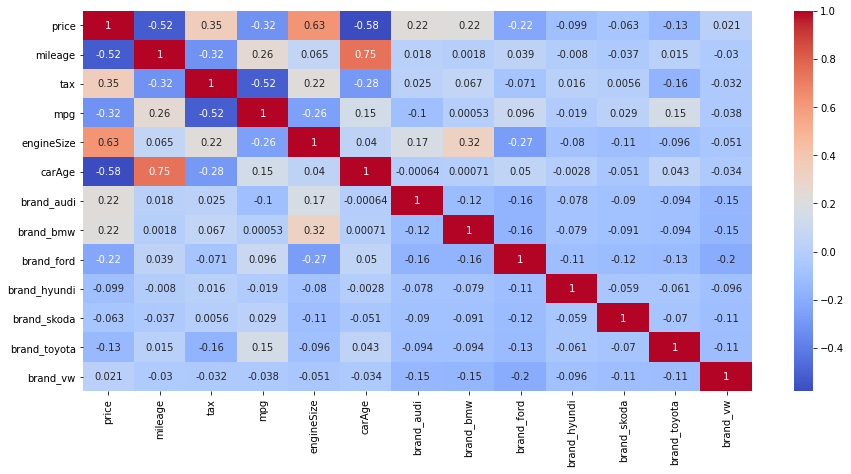

In [ ]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

# Apply Model
This cell applies the model on the validation dataset. (It predicts the price for every car in the validation set)

In [ ]:
validate_apply = pd.DataFrame(columns = ['predicted_price', 'actual_price'])
validate_apply["predicted_price"] = model.predict(X_validate)
validate_apply["actual_price"] = y_validate

In [ ]:
# Rverse Box-Cox Transformation
validate_apply["predicted_price"] = pt.inverse_transform(validate_apply[["predicted_price"]])
validate_apply["actual_price"] = pt.inverse_transform(validate_apply[["actual_price"]])

##LinLin Function
This cell defines the LinearLinear cost function. It checks if the residual is greater than 0. If yes, it multiplies the ratio of asymetry which represents the asymetric costs. 

In [ ]:
def linlin(ratio, md, actual, prediction): 
    residual = (md + (prediction - actual))
    
    if residual < 0:            # Overprediction
        actualCosts = abs(residual) * ratio
    else:       # Underprediction
        actualCosts = abs(residual)    
    return actualCosts

## Quadratic Quadratic

This cell defines the QuadraticQuadratic cost function. It checks if the residual is greater than 0. If yes, it multiplies the ratio of asymetry which represents the asymetric costs. 

In [ ]:
def qq(ratio, md, actual, prediction): 
    residual = (md + (prediction - actual))
    
    if residual < 0:            # Overprediction
        actualCosts = ratio * (residual**2)   
    else:                       # Underprediction
        actualCosts = (residual)**2    
    return actualCosts

## Linex

This cell defines the Linear Exponential cost function. However we did not use it since our residuals are too big and would provoke an overflow error.

In [ ]:
def linex(ratio, md, actual, prediction): 
    residual = (md + (prediction - actual))

    actualCosts = np.exp(residual*ratio)-(residual*ratio)-1

    return actualCosts

## Actual Costs Function
This cell defines the function that calculates the actual costs. It uses the linlin / qq / linex function from the previous cell and applies it on our dataset with the actual and predicted price. Finally it uses mean() to calculate the average misprediction over all residuals.

In [ ]:
def AMCosts(ratio, md, whichCostFunction):

    if whichCostFunction =="linlin":
      validate_apply["MispredictionCosts"] = validate_apply.apply(lambda x: linlin(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
      AverageMispredictionCosts = validate_apply["MispredictionCosts"].mean()
    
    elif whichCostFunction =="qq":
      validate_apply["MispredictionCosts"] = validate_apply.apply(lambda x: qq(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
      AverageMispredictionCosts = validate_apply["MispredictionCosts"].mean()

    elif whichCostFunction =="linex":
      validate_apply["MispredictionCosts"] = validate_apply.apply(lambda x: linex(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
      AverageMispredictionCosts = validate_apply["MispredictionCosts"].mean()

    else:
      print("set a value for the variable whichCostFunction to chose the cost function")
    
    return AverageMispredictionCosts

## Markdown Algorithm
This cell is the implementation of the markdownalgorithm suggested by Gaurav Bansal.

Source: Bansal, G, Sinha, A P, and Zhao, H 2008 Tuning Data Mining Methods for Cost-Sensitive Regression: A Study in Loan Charge-Off Forecasting. Journal of Management Information Systems, 25(3): 315–336. DOI: https://doi.org/10.2753/MIS0742-1222250309


In [42]:
def find_md(ratio, whichCostFunction):
  md = 0
  p = 1
  s = 1

  # This part determines d which defines the "direction" of our markdown
  if AMCosts(ratio, p, whichCostFunction) < AMCosts(ratio, 0, whichCostFunction):
    d = 1
  else:
    d = -1

  md_prev = 0
  md_next = md + s * d * p

  while True:
   s = 1
   md = md_prev

   while True:  
      #print("markdown is: " + str(md))
      md_prev = md
      md = md + s * d * p
      s = s * 2
      md_next = md + s * d * p
      if AMCosts(ratio, md_next, whichCostFunction) > AMCosts(ratio, md, whichCostFunction):
        break
        
        #print("costs are: " + str(AMCosts(ratio, md)))
   if s <= 2:
     break
  optimal_md = md
  #print("The optimal markdown value is: " + str(md))
  return optimal_md

This cell applies the linlin and qq costs function on the dataset with different ratios of cost asymetry (ratio: 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0) 

In [43]:
ratio_list = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
CostFunctions = ["linlin","qq"]
results = pd.DataFrame(columns=['CostFunction','Ratio','Markdown', 'Average Misprediction Costs', 'Average Misprediction Costs with md = 0'])

for function in CostFunctions:
  for ratio in ratio_list:
    md = find_md(ratio, function)
    AMC = AMCosts(ratio, md, function)
    AMC_md0 = AMCosts(ratio, 0, function)
    results = results.append({'CostFunction': function, 'Ratio': ratio, 'Markdown': md, 'Average Misprediction Costs':AMC, 'Average Misprediction Costs with md = 0':AMC_md0 }, ignore_index=True)
    print("ratio: " + str(ratio) + " markdown: " + str(md) + " the average misprediction costs are: " + str(AMC) + " The AMC for md = 0 are: " + str(AMC_md0))

results

ratio: 1.0 markdown: 67 the average misprediction costs are: 2357.1942797127886 The AMC for md = 0 are: 2357.9932175444337
ratio: 1.1 markdown: 194 the average misprediction costs are: 2483.0222914433352 The AMC for md = 0 are: 2490.494741076381
ratio: 1.2 markdown: 309 the average misprediction costs are: 2603.089925133421 The AMC for md = 0 are: 2622.99626460834
ratio: 1.3 markdown: 418 the average misprediction costs are: 2718.1611117687125 The AMC for md = 0 are: 2755.497788140313
ratio: 1.4 markdown: 518 the average misprediction costs are: 2828.7402710486167 The AMC for md = 0 are: 2887.999311672263
ratio: 1.5 markdown: 620 the average misprediction costs are: 2934.985547197761 The AMC for md = 0 are: 3020.5008352042396
ratio: 1.6 markdown: 711 the average misprediction costs are: 3037.495421255567 The AMC for md = 0 are: 3153.002358736187
ratio: 1.7 markdown: 794 the average misprediction costs are: 3136.5733940706546 The AMC for md = 0 are: 3285.503882268137
ratio: 1.8 markdown

,CostFunction,Ratio,Markdown,Average Misprediction Costs,Average Misprediction Costs with md = 0
0,linlin,1.0,67,2.357194e+03,2.357993e+03
1,linlin,1.1,194,2.483022e+03,2.490495e+03
2,linlin,1.2,309,2.603090e+03,2.622996e+03
3,linlin,1.3,418,2.718161e+03,2.755498e+03
4,linlin,1.4,518,2.828740e+03,2.887999e+03
5,linlin,1.5,620,2.934986e+03,3.020501e+03
6,linlin,1.6,711,3.037495e+03,3.153002e+03
7,linlin,1.7,794,3.136573e+03,3.285504e+03
8,linlin,1.8,872,3.232670e+03,3.418005e+03
9,linlin,1.9,944,3.326114e+03,3.550507e+03


In [44]:
  results.round(1)

,CostFunction,Ratio,Markdown,Average Misprediction Costs,Average Misprediction Costs with md = 0
0,linlin,1.0,67,2357.2,2358.0
1,linlin,1.1,194,2483.0,2490.5
2,linlin,1.2,309,2603.1,2623.0
3,linlin,1.3,418,2718.2,2755.5
4,linlin,1.4,518,2828.7,2888.0
5,linlin,1.5,620,2935.0,3020.5
6,linlin,1.6,711,3037.5,3153.0
7,linlin,1.7,794,3136.6,3285.5
8,linlin,1.8,872,3232.7,3418.0
9,linlin,1.9,944,3326.1,3550.5


## Test Part
Now we test if the markdown values calculated previously also decreases the AMC for the testset.


In [45]:
test_apply = pd.DataFrame(columns = ['predicted_price', 'actual_price'])
test_apply["predicted_price"] = model.predict(X_test)
test_apply["actual_price"] = y_test

# Rverse Box-Cox Transformation
test_apply["predicted_price"] = pt.inverse_transform(test_apply[["predicted_price"]])
test_apply["actual_price"] = pt.inverse_transform(test_apply[["actual_price"]])

In [46]:
def AMCosts_test(ratio, md, whichCostFunction):

  if whichCostFunction =="linlin":
    test_apply["MispredictionCosts"] = test_apply.apply(lambda x: linlin(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
    AverageMispredictionCosts = test_apply["MispredictionCosts"].mean()
    
  elif whichCostFunction =="qq":
    test_apply["MispredictionCosts"] = test_apply.apply(lambda x: qq(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
    AverageMispredictionCosts = test_apply["MispredictionCosts"].mean()

  elif whichCostFunction =="linex":
    test_apply["MispredictionCosts"] = test_apply.apply(lambda x: linex(ratio, md, x["actual_price"], x["predicted_price"]),axis=1)
    AverageMispredictionCosts = test_apply["MispredictionCosts"].mean()

  else:
      print("set a value for the variable whichCostFunction to chose the cost function")

  return AverageMispredictionCosts

In [47]:
results_testset = pd.DataFrame(columns=['CostFunction','Ratio','Markdown', 'Average Misprediction Costs', 'Average Misprediction Costs with md = 0'])

for index, row in results.iterrows():
  AMC_testset = AMCosts_test(row['Ratio'], row['Markdown'], row['CostFunction'])
  results_testset = results_testset.append({'CostFunction': row['CostFunction'], 'Ratio': row['Ratio'], 'Markdown': row['Markdown'], 'Average Misprediction Costs':AMC_testset, 'Average Misprediction Costs with md = 0':AMCosts_test(row['Ratio'], 0, row['CostFunction']) }, ignore_index=True)
  #print("ratio: " + str(r) + " markdown: " + str(m) + " the average misprediction costs is: " + str(AMC_testset) + " The AMC for md = 0 is: " + str(AMCosts_test(r, 0)))

In [48]:
results_testset.round(1)


,CostFunction,Ratio,Markdown,Average Misprediction Costs,Average Misprediction Costs with md = 0
0,linlin,1.0,67,2334.5,2335.6
1,linlin,1.1,194,2459.2,2467.4
2,linlin,1.2,309,2577.9,2599.1
3,linlin,1.3,418,2691.2,2730.9
4,linlin,1.4,518,2799.7,2862.7
5,linlin,1.5,620,2903.9,2994.5
6,linlin,1.6,711,3004.7,3126.3
7,linlin,1.7,794,3102.0,3258.1
8,linlin,1.8,872,3196.1,3389.9
9,linlin,1.9,944,3287.4,3521.7


In [49]:
results_testset.to_excel("results.xlsx")